### Importing Libraries and Data

In [1]:
import pandas as pd
# Reading Tab separated Value
data = pd.read_csv(r'D:\DigitalVidya\MachineLearning\Chapter11_NLP\Assignment Folder\SMSSpamCollection.tsv', sep='\t', names=['label', 'body_text'], header=None)
# Print first 5 data
data.head()
data.shape

(5568, 2)

In [2]:
data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

### Preprocessing Data

In [3]:
### Q1. Preprocess the data so that stopwords are removed
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    msg = [word for word in msg.split() if word not in stopwords]
    return msg

In [4]:
### Q2. Write down a function that can count percentage of punctuation marks in the text
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100



### Split into train/test and Vectorize text

In [5]:
### Q3. Split the whole data set into training and test datasets
## Q4. For the test and train datasets create a TfIdfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix


In [6]:
vectorizer = TfidfVectorizer(analyzer=review_messages)
vector_output = vectorizer.fit_transform(data['body_text'])

In [7]:
pd.DataFrame(vector_output.toarray())

,0,1,2,3,4,5,6,7,8,9,...,13413,13414,13415,13416,13417,13418,13419,13420,13421,13422
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))


In [9]:
data.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [10]:
x_features = pd.concat([data['body_len'],data['punct%'],pd.DataFrame(vector_output.toarray())],axis=1)

In [11]:
x_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,13413,13414,13415,13416,13417,13418,13419,13420,13421,13422
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Final evaluation of models

In [12]:
## Q5. Create a Ensemble classifier that can predict if the given Text is a Spam or a Ham 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_features,data['label'])

In [14]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(x_train,y_train)

In [15]:
y_pred=rf_model.predict(x_test)

In [17]:
## Q6. Evaluate the performance of your model using confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

(1.0, 0.797979797979798, 0.8876404494382023)

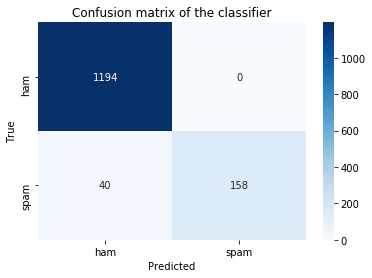

In [20]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,fmt='g', cmap='Blues' ,xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the classifier')
precision,recall,fscore,support =score(y_test,y_pred,pos_label='spam', average ='binary')
precision,recall,fscore